In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))

In [2]:
set.seed(42)
addArchRThreads(threads = 64)

Setting default number of Parallel threads to 64.



In [3]:
proj <- loadArchRProject("./ArchRProject_epithelial", showLogo = FALSE)

Successfully loaded ArchRProject!



In [4]:
### ArchRProject 已经添加了motif注释
### 已经添加背景峰
## 计算偏离值
proj <- addDeviationsMatrix(
  ArchRProj = proj, 
  peakAnnotation = "Motif",
  force = TRUE
)

Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-1b56e8552a8e36-Date-2025-03-05_Time-09-32-49.697969.log
If there is an issue, please report to github with logFile!

2025-03-05 09:33:49.577436 : Batch Execution w/ safelapply!, 0 mins elapsed.

###########
2025-03-05 10:29:47.838022 : Completed Computing Deviations!, 56.969 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-addDeviationsMatrix-1b56e8552a8e36-Date-2025-03-05_Time-09-32-49.697969.log



DataFrame with 6 rows and 6 columns
     seqnames       idx        name combinedVars combinedMeans      rank
        <Rle> <integer> <character>    <numeric>     <numeric> <integer>
f357        z       357   FOXA1_357      76.3865       8.20420         1
f139        z       139    JUNB_139      72.5997      -1.49000         2
f651        z       651 SMARCC1_651      71.6538      -1.64508         3
f105        z       105   FOSL2_105      70.7509      -1.44505         4
f142        z       142   FOSL1_142      70.3055      -1.38680         5
f355        z       355   FOXA2_355      68.7442       7.72933         6


Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


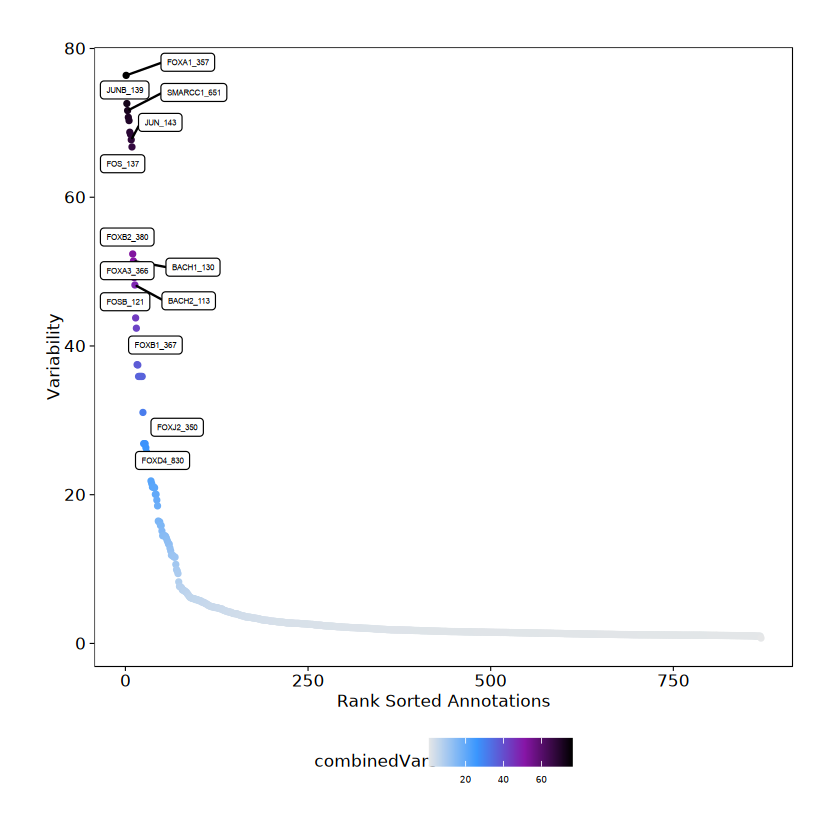

In [5]:
plotVarDev <- getVarDeviations(proj, name = "MotifMatrix", plot = TRUE)
plotVarDev

In [6]:
motifs <- c("FOXA1", "JUNB", "SMARCC1", "FOSL2", "FOSL1", "FOXA2", "Ebox", "E2A")
markerMotifs <- getFeatures(proj, select = paste(motifs, collapse = "|"), useMatrix = "MotifMatrix")
markerMotifs

[1] "z:SMARCC1_651"          "z:FOXA1_357"            "z:FOXA2_355"           
 [4] "z:FOSL1_142"            "z:JUNB_139"             "z:FOSL2_105"           
 [7] "deviations:SMARCC1_651" "deviations:FOXA1_357"   "deviations:FOXA2_355"  
[10] "deviations:FOSL1_142"   "deviations:JUNB_139"    "deviations:FOSL2_105"

In [7]:
markerMotifs <- grep("z:", markerMotifs, value = TRUE)
markerMotifs

[1] "z:SMARCC1_651" "z:FOXA1_357"   "z:FOXA2_355"   "z:FOSL1_142"  
[5] "z:JUNB_139"    "z:FOSL2_105"

In [9]:
p <- plotGroups(
  ArchRProj = proj, 
  groupBy = "clusters", 
  colorBy = "MotifMatrix", 
  name = markerMotifs,
  imputeWeights = getImputeWeights(proj)
)

Getting ImputeWeights

No imputeWeights found, returning NULL



Getting Matrix Values...

2025-03-05 11:00:14.41986 : 



1 
2 
3 
4 
5 
6 




In [10]:
p2 <- lapply(seq_along(p), function(x){
  if(x %% 6 != 1){
    p[[x]] + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6) +
    theme(plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm")) +
    theme(
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank()
    ) + ylab("")
  }else{
    p[[x]] + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6) +
    theme(plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm")) +
    theme(
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank()
    ) + ylab("")
  }
})

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


Picking joint bandwidth of 1.24

Picking joint bandwidth of 0.856

Picking joint bandwidth of 0.826

Picking joint bandwidth of 1.25

Picking joint bandwidth of 1.27

Picking joint bandwidth of 1.25



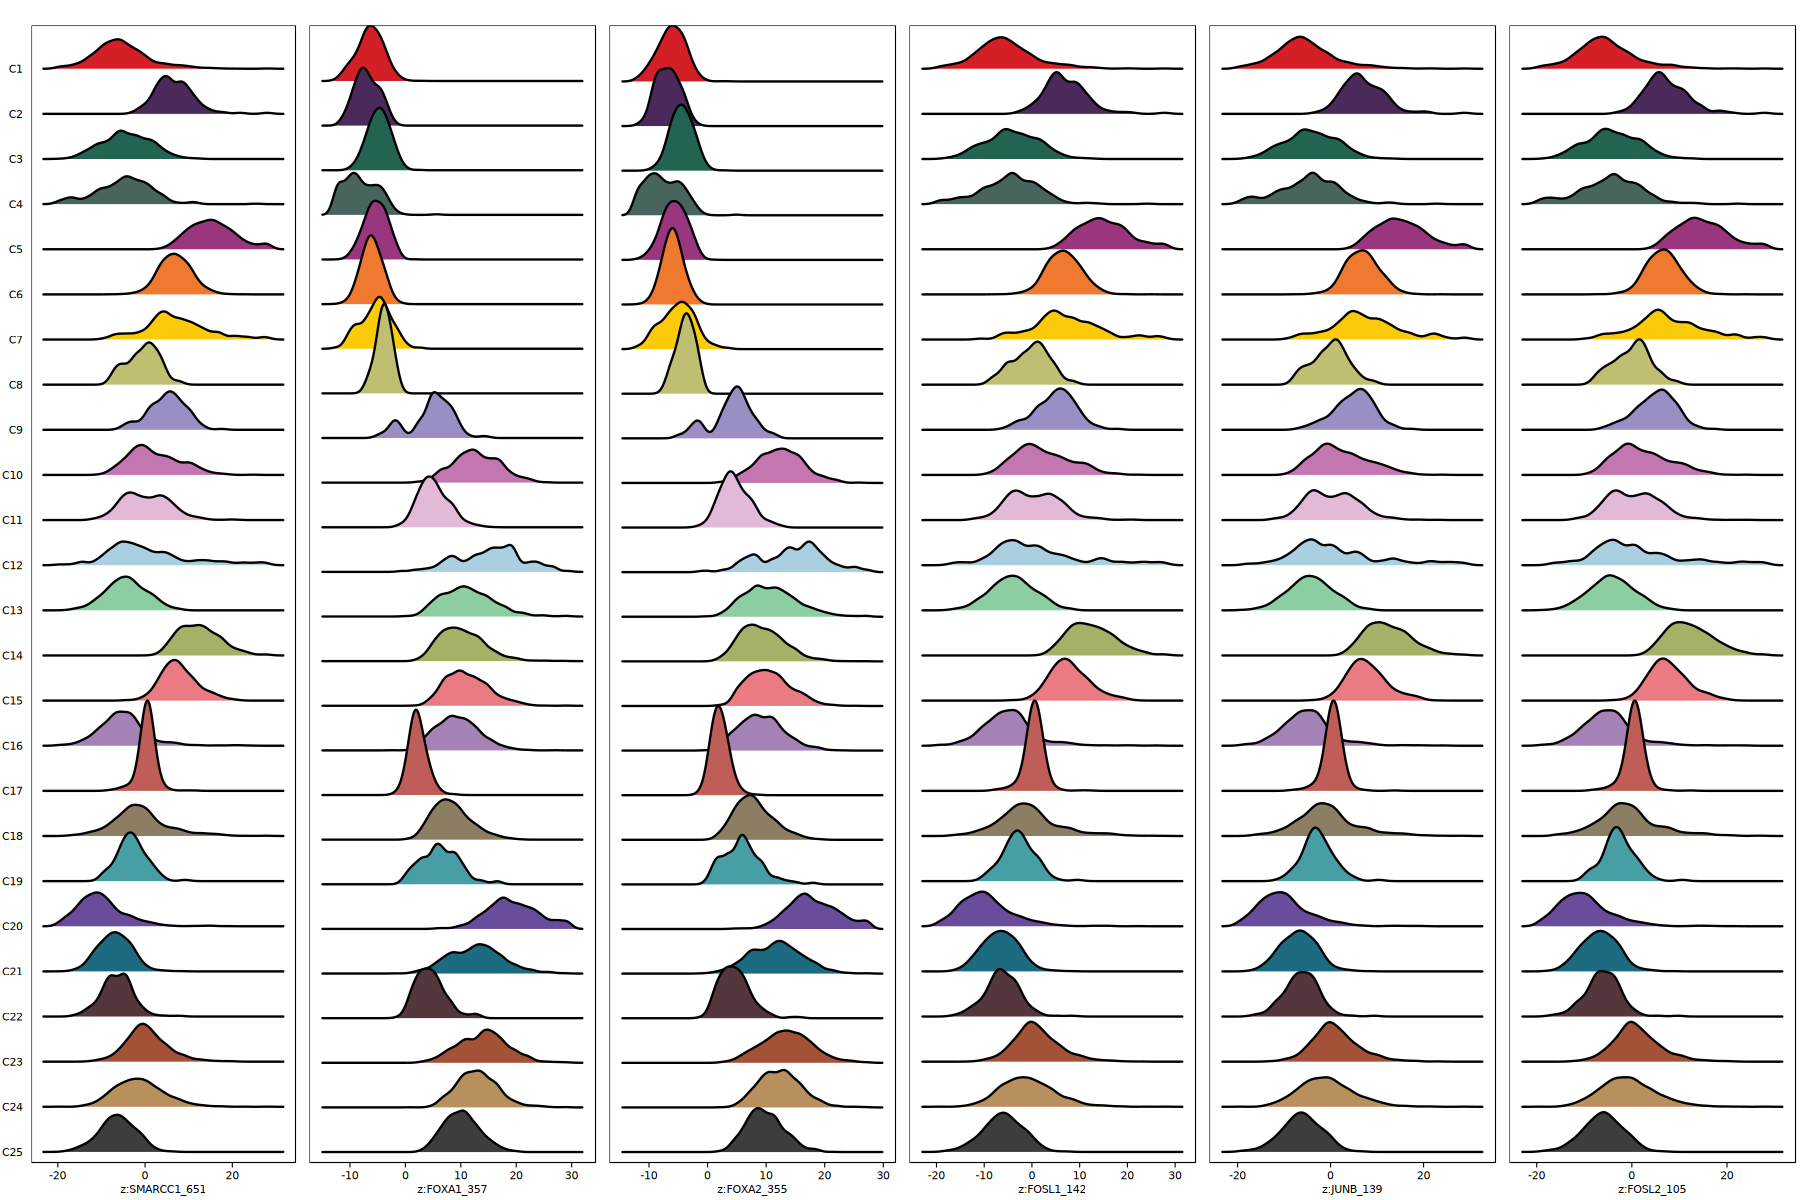

In [11]:
options(repr.plot.width = 15, repr.plot.height =10)
# 将p2分割成每6个元素一组
p2_split <- split(p2, ceiling(seq_along(p2)/6))

# 对每一组元素，创建一个图形网格
p2_grids <- lapply(p2_split, function(p2_group) {
  do.call(cowplot::plot_grid, c(list(nrow = 1, rel_widths = rep(1, length(p2_group))), p2_group))
})

# 将所有的图形网格组合成一个图形网格
final_grid <- do.call(cowplot::plot_grid, c(list(nrow = length(p2_grids)), p2_grids))

# 绘制最终的图形网格
print(final_grid)